In [1]:
using DrWatson
@quickactivate :ExtendedKalmanFilterNeuralTraining

In [5]:
using ModelingToolkit, DataFrames
using DifferentialEquations: PresetTimeCallback

@named covid19 = COVID19()
display(covid19)

COVID_tspan = (0.0, 21.0)
COVID_prob = ODEProblem(covid19, [], COVID_tspan)
COVID_sol = solve(COVID_prob);

x = DataFrame(hcat(map(COVID_sol, 0.0:0.1:max(COVID_tspan...))...)', ["T", "V"]);

Model covid19 with 2 equations
States (2):
  T(t) [defaults to 1.0e6]
  V(t) [defaults to 0.31]
Parameters (8):
  p [defaults to 5.01]
  r [defaults to 0.316]
  c_T [defaults to 1.0e-6]
  s_T [defaults to 100000.0]
⋮

In [6]:
RHONN, params = COVID19_model(x)
X_Tikonov = train!(RHONN, x, params; algorithm=TikonovEKF!(α=0));

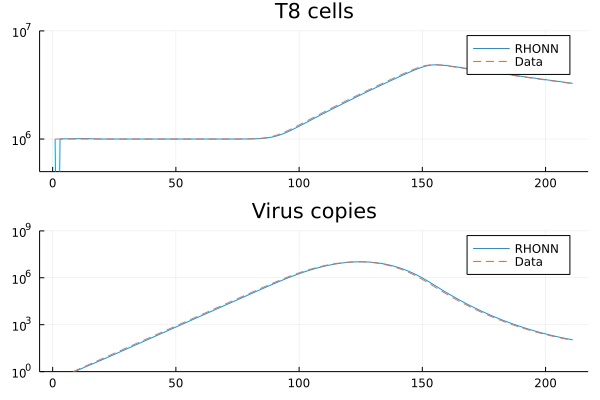

In [8]:
using Plots, StatsPlots

@df X_Tikonov plot(:T, label="RHONN", title="T8 cells", yrange=(5e5,1e7), yscale=:log10)
p1 = @df x plot!(:T, ls=:dash, label="Data")
@df X_Tikonov plot(:V, label="RHONN", title="Virus copies", yrange=(1,1e9), yscale=:log10)
p2 = @df x plot!(:V, ls=:dash, label="Data")
plot(p1, p2, layout=(2,1))